In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

## Linear Discriminant Analysis (LDA):

* A Generative Model
* Used for both Classification and Dimensionality Reduction
* LDA assumes the class distributions are Gaussian with equal standard deviations or covariances matrices.


### LDA for Classification


* LDA models the distribution of the predictors separately for each response class and then uses Bayes' theorem to calculate Pr(Y = k | X= x)
* Why use LDA
    - Used when more than 2 response classes
    - LDA has a  closed-form solution that can be easily computed 
    - No hyperparameters to tune.

* Given:
    - n observations $((x_1,y_1),(x_2,y_2),...,(x_n,y_n)), x \in R^d y\in \{0,1,2,..,k\}$
    - k different classes
    - prior probability, $\pi_k$ ,  that a random observation comes from the kth class  
        - Estimated from the data
* Let $f_k{(X)} = Pr(X=x|Y=k)$ denote the Probability Density Function of X for an observation that comes from the kth class
* By Bayes' Theorem:   
<div style="font-size: 110%;">       
$$Pr(Y = k | X= x) = \frac{\pi_k\cdot{f_k{(x)}}}{\sum^K_{l=1}\pi_l\cdot{f_l{(x)}}}$$
</div>
          
####  LDA with one predictor (p = 1)  
Assume $f_k{(x)}$ is Gaussian  

<div style="font-size: 125%;">       
$$f_k{(x)} = \frac{1}{\sigma_k\sqrt{2\pi}}e^{-\frac{(x-\mu_k)^2}{2\sigma_k^2}}$$
Assume $\sigma_1 = \sigma_2 = \sigma_K$  
$$Pr(Y=k | X=x) \propto {\pi_k\cdot {\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu_k)^2}{2\sigma^2} }} }$$
</div>
  
Taking the log, and doing some algebra (expanding the quadratic and dropping terms not depending on k) compute the discriminant function $\delta_k{(x)}$ for class k with parameters $\mu_k, \sigma^2, \pi_k$

<div style="font-size: 115%;"> 
$$\delta_k{(x)} = x\cdot{\frac{\mu_k}{\sigma^2}} - \frac{\mu_k^2}{2\sigma^2} + log(\pi_k)$$
</div> 

* Assign the observation to the class for which the discriminant function is the largest. 

### Estimate the Parameters

#### Mean $\mu_k$      
<div style="font-size: 115%;"> 
$$ \hat{\mu_k} = \frac{1}{n_k}\sum_{i:y_i=k}x_i$$
</div>

#### Variation (called scatter in LDA)  $\sigma^2$
<div style="font-size: 115%;"> 
$$ \hat{\sigma^2} = \frac{1}{n - K}\sum^K_{i=1}\sum_{i:y_i=k}(x_i - \hat{\mu}_k)^2$$
</div>

####  Prior: $\pi_k$
* Just calculate proportion of training samples belonging to the kth class.  

<div style="font-size: 125%;"> 
$$\hat{\pi}_k = n_k/n$$
</div>

#### LDA with more than one predictor

* The LDA classifier assumes that the observations in the kth class are drawn from a multivariate Gaussian distribution $N(\mu_k,\Sigma^{-1})$
    - $\mu_k$: mean for kth class
    - $\Sigma$: covariance matrix that is the same for all K classes.
    
<div style="font-size: 115%;">     
$$\delta_k(x) = x^T\Sigma^{-1}\mu_k -\frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + log(\pi_k)$$
</div>

http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

#### Wine dataset

https://archive.ics.uci.edu/ml/datasets/wine

* Predict Customer_Segment from 13 numerical features

In [1]:
wine = pd.read_csv('Wine.csv')
wine.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [2]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


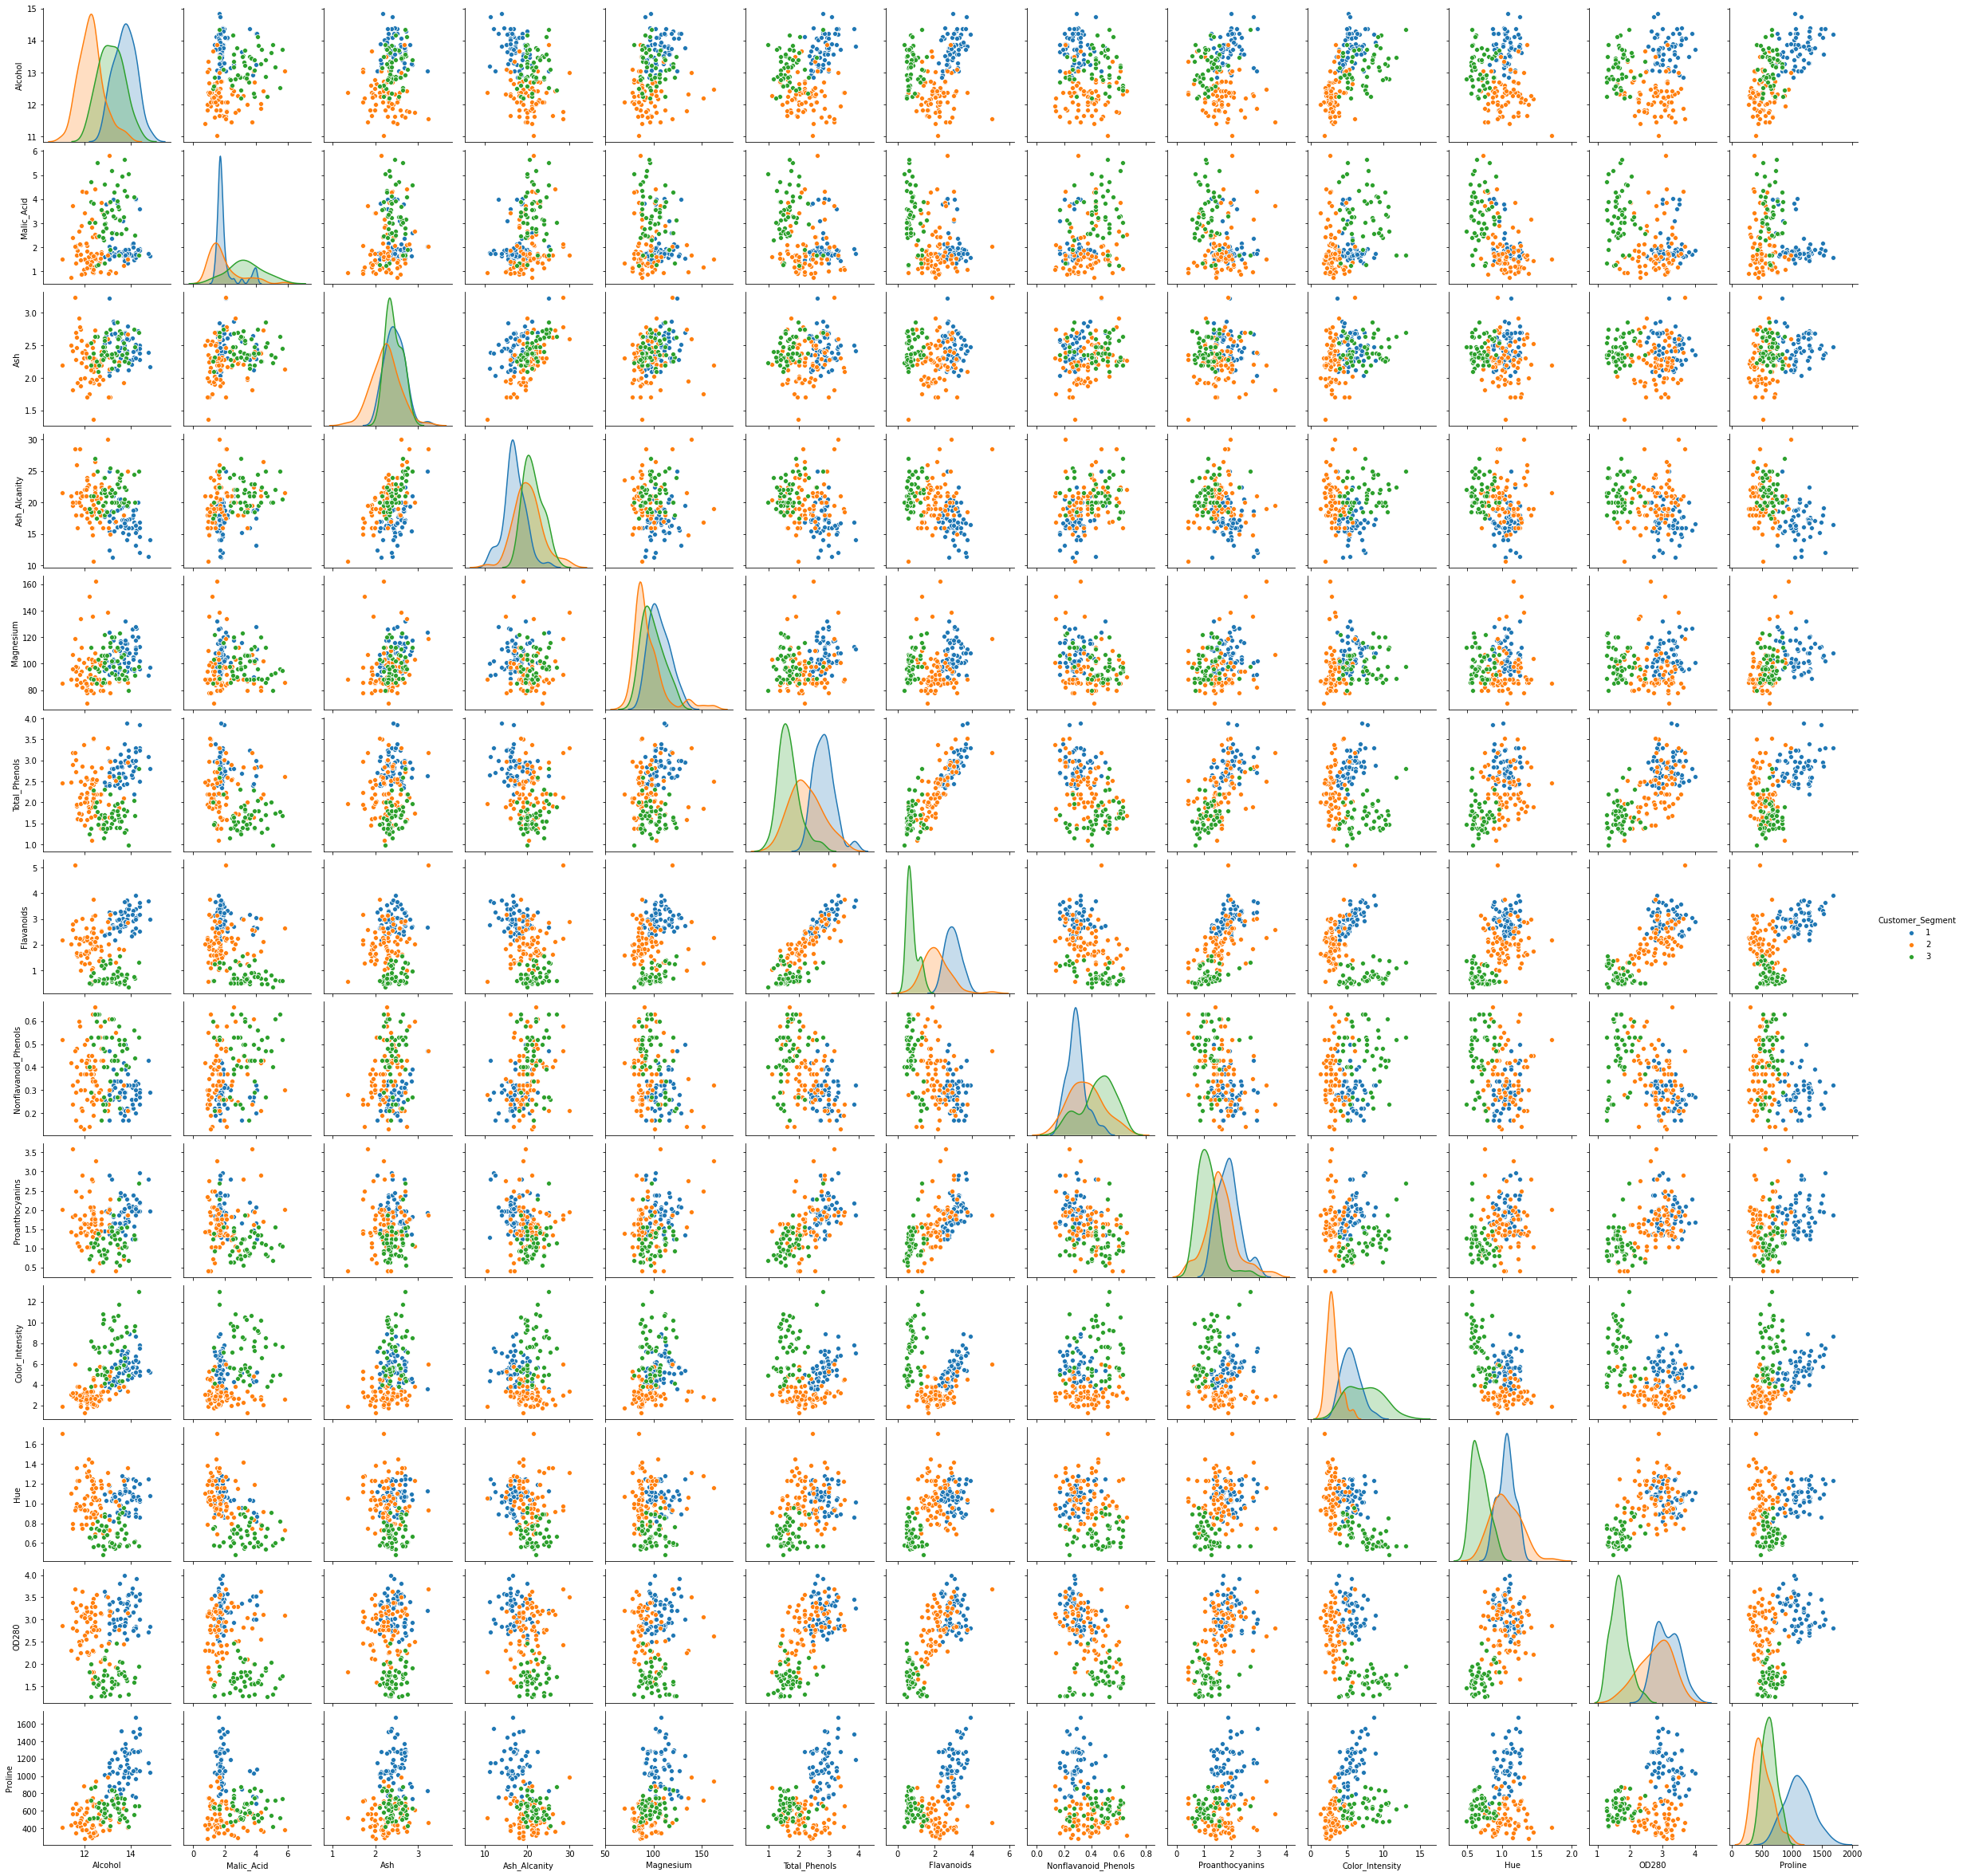

In [3]:
sns.pairplot(wine,hue='Customer_Segment');

In [ ]:
X = wine.iloc[:, 0:13].values
y = wine.iloc[:, 13].values
y =  LabelEncoder().fit_transform(y) # Encode
X.shape,y.shape 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 

#### Applying LDA for classification

In [ ]:

model = LDA()
model.fit(X_train, y_train)
 

In [ ]:
model.get_params()

In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

### Quadratic Linear Discriminant Analysis (QLA)

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis

* Relaxes equal standard deviation assumption among classes 
* For one predictor:
<div style="font-size: 115%;"> 
$$\delta_k{(x)} = -\frac{1}{2}\frac{x^2}{\sigma_k^2} +x\cdot{\frac{\mu_k}{\sigma_k^2}} - \frac{\mu_k^2}{2\sigma_k^2} + \frac{1}{2}log|\sigma_k^2| + log(\pi_k)$$
</div>
* For more than 1 predictor replace $\sigma$ with covariance matrix $\Sigma$
* Discriminant function has a quadratic term ($x^2$) since that term does depend on k because of the unequal standard deviation assumption and therefore is not dropped.
* QDA is more flexible (i.e. more complex) but has many more parameters than LDA (i.e. $\sigma_k$ for each class).
* Prefer LDA if equal variance assumption holds but QDA if it doesn't

#### Stock Market data

* The percentage returns for the S&P 500 stock index from 2001-2005.
* Lag1 -Lag5: The percentage returns for each of the five previous trading days
* Volume: The number of shares traded on the previous day, in billions
* Today: The percentage return on the date of the row.
* Direction: Up or Down on this date.

In [ ]:
df = pd.read_csv('Smarket.csv',index_col=0)
print(df.shape)
df.head()

In [ ]:
df.describe()

In [ ]:
corr = df.corr()
corr

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(corr);

In [ ]:
df.groupby('Direction').var()


In [ ]:
train = df.query('Year<2005')
test = df.query('Year == 2005')
feats = ['Lag1','Lag2']
X_train = train[feats]
y_train = train['Direction']
X_test = test[feats]
y_test = test['Direction']
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
model_qda = QDA()
model_qda.fit(X_train,y_train)
y_pred = model_qda.predict(X_test)

In [ ]:
print('Mean for class 0 is - ',model_qda.means_[0])
print('Mean for class 1 is - ',model_qda.means_[1])
print('Prior probalbilities - ',model_qda.priors_)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
accuracy_score(y_test,y_pred)
print('Accuracy using QDA is ',s)

#### Compare with LDA

In [ ]:
model_lda = LDA()
model_lda.fit(X_train,y_train)
y_pred = model_lda.predict(X_test)

In [ ]:
print('Prior Probs are - ',model_lda.priors_)
print('Class Means are  - ',model_lda.means_)
print('Coeff are - ',model_lda.coef_)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
(cm[0,0]+cm[1,1])/np.sum(cm)

In [ ]:
s = accuracy_score(y_test,y_pred)
print('Accuracy using LDA is ',s)

#### LDA/QDA versus Logistic Regression

* In general LDA/QDA achieve better performance than logistic regression when the features are normally distributed
* Logistic Regression works better when the features are not normally distributed